In [51]:
import os
import matplotlib.pyplot as plt
import requests as req
import pandas as pd

In [52]:
# Save config information.
api_key = "5115432d993d25be015121f9b5f69e81"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [53]:
weather_data = []
cities = ["maroldsweisach", "triunfo", "guantianba", "pueblito","lima", "heit"]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_data.append(response)

weather_data

[{'base': 'stations',
  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': 50.2, 'lon': 10.66},
  'dt': 1520035477,
  'id': 2873228,
  'main': {'grnd_level': 960.86,
   'humidity': 78,
   'pressure': 960.86,
   'sea_level': 1016.97,
   'temp': 16.22,
   'temp_max': 16.22,
   'temp_min': 16.22},
  'name': 'Maroldsweisach',
  'sys': {'country': 'DE',
   'message': 0.0047,
   'sunrise': 1520056626,
   'sunset': 1520096540},
  'weather': [{'description': 'broken clouds',
    'icon': '04n',
    'id': 803,
    'main': 'Clouds'}],
  'wind': {'deg': 76.5042, 'speed': 4.43}},
 {'base': 'stations',
  'clouds': {'all': 48},
  'cod': 200,
  'coord': {'lat': -7.84, 'lon': -38.1},
  'dt': 1520035478,
  'id': 3391172,
  'main': {'grnd_level': 959.24,
   'humidity': 92,
   'pressure': 959.24,
   'sea_level': 1026.41,
   'temp': 70.63,
   'temp_max': 70.63,
   'temp_min': 70.63},
  'name': 'Triunfo',
  'sys': {'country': 'BR',
   'message': 0.0051,
   'sunrise': 1520066232,
   'sunset': 1520110276

In [54]:
# Extract interesting data from responses
lat_data = [data.get("coord").get("lat") for data in weather_data]
temp_data = [data.get("main").get("temp") for data in weather_data]
hum_data = [data.get("main").get("humidity") for data in weather_data]
cloud_data = [data.get("clouds").get("all") for data in weather_data]
wind_data = [data.get("wind").get("speed") for data in weather_data]

weather_data = {"temp": temp_data, "lat": lat_data, 'hum': hum_data, 'cloud' : cloud_data, 'wind': wind_data,}
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,cloud,hum,lat,temp,wind
0,76,78,50.20,16.22,4.43
1,48,92,-7.84,70.63,3.31
2,92,100,29.76,45.88,1.63
3,92,98,-0.68,73.06,4.76
4,32,62,-12.06,65.77,2.64


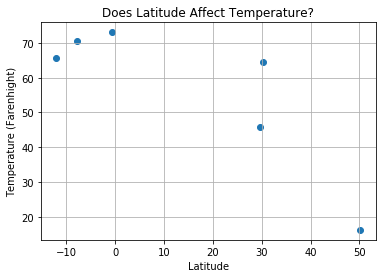

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Does Latitude Affect Temperature?")
plt.ylabel("Temperature (Farenhight)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_tem.jpg")

# Show plot
plt.show()

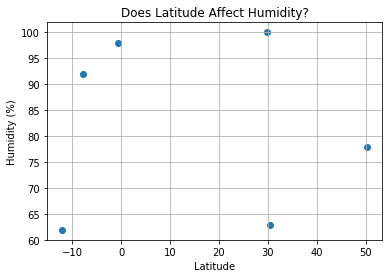

In [56]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["hum"], marker="o")

# Incorporate the other graph properties
plt.title("Does Latitude Affect Humidity?")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_hum.jpg")

# Show plot
plt.show()

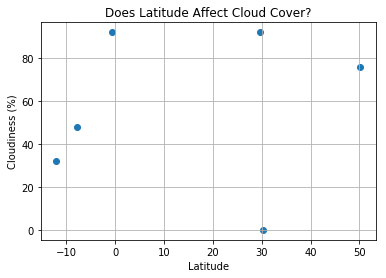

In [57]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloud"], marker="o")

# Incorporate the other graph properties
plt.title("Does Latitude Affect Cloud Cover?")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_cloud.jpg")

# Show plot
plt.show()

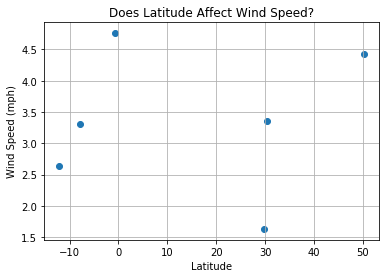

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Does Latitude Affect Wind Speed?")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_wind.jpg")

# Show plot
plt.show()